# Events / day

The following code displays the amount of events per day

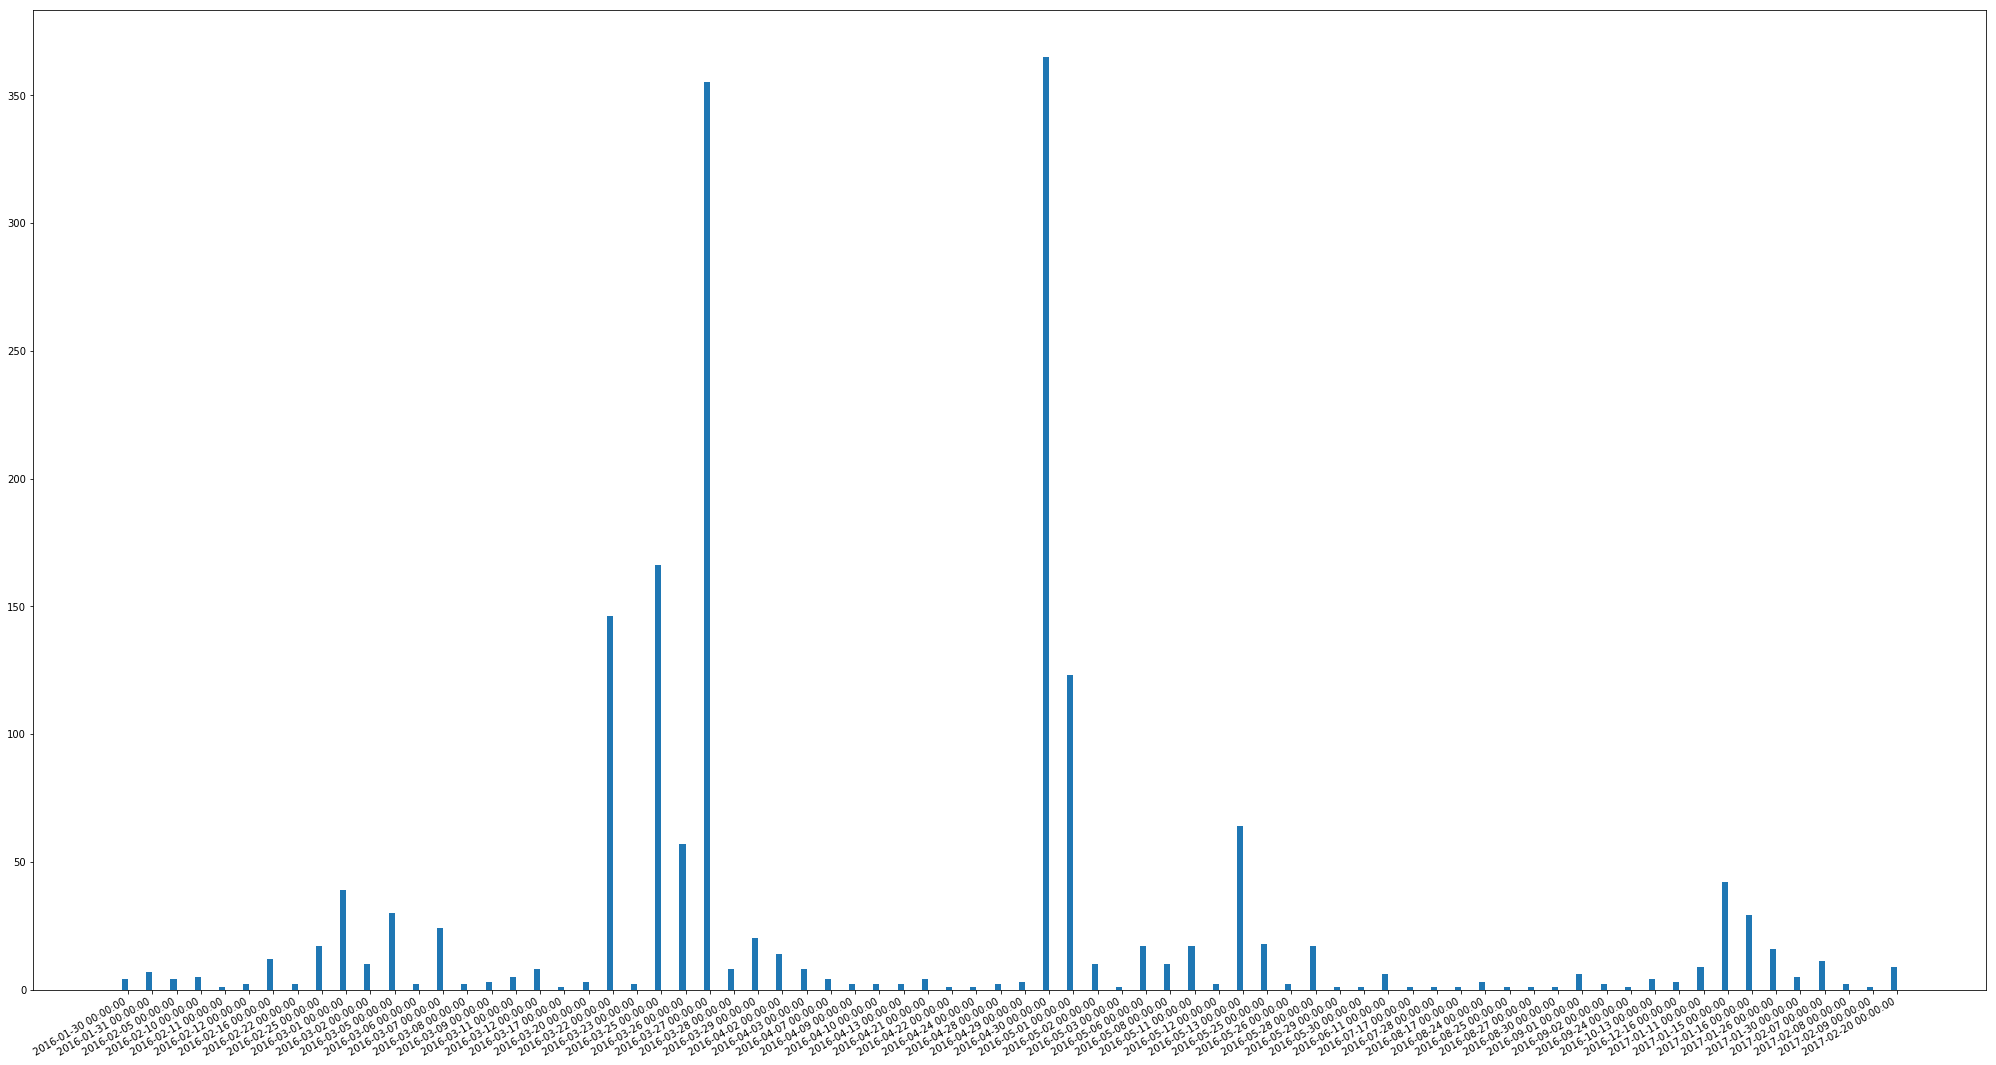

In [3]:
import re
import datetime
import matplotlib.pyplot as plt
from dateutil.parser import parse
import numpy as np

infile = r"../include/logs/php_error_casper.log"

event_date_list = []
event_count = []
previous_match = False


    
with open(infile) as f:
    f = f.readlines()

    
for idx, line in enumerate(f):
        match = re.findall(r"\[\s*(\d+-\D+-.*?)\s", line)
        if match:
            if not previous_match or match != previous_match:
                dt = parse(match[0])
                event_date_list.append(dt)
                event_count.append(1)
                previous_match = match
            else:
                event_count[-1] = event_count[-1] + 1
                

fig = plt.figure(figsize=(35,20))

width = .25
ind = np.arange(len(event_count))
plt.bar(ind, event_count, width=width)
plt.xticks(ind + width / 2, event_date_list)

fig.autofmt_xdate()

plt.show()


# Excluding certain days

The following code excludes exceptional high event days to increase output detail

<IPython.core.display.Javascript object>


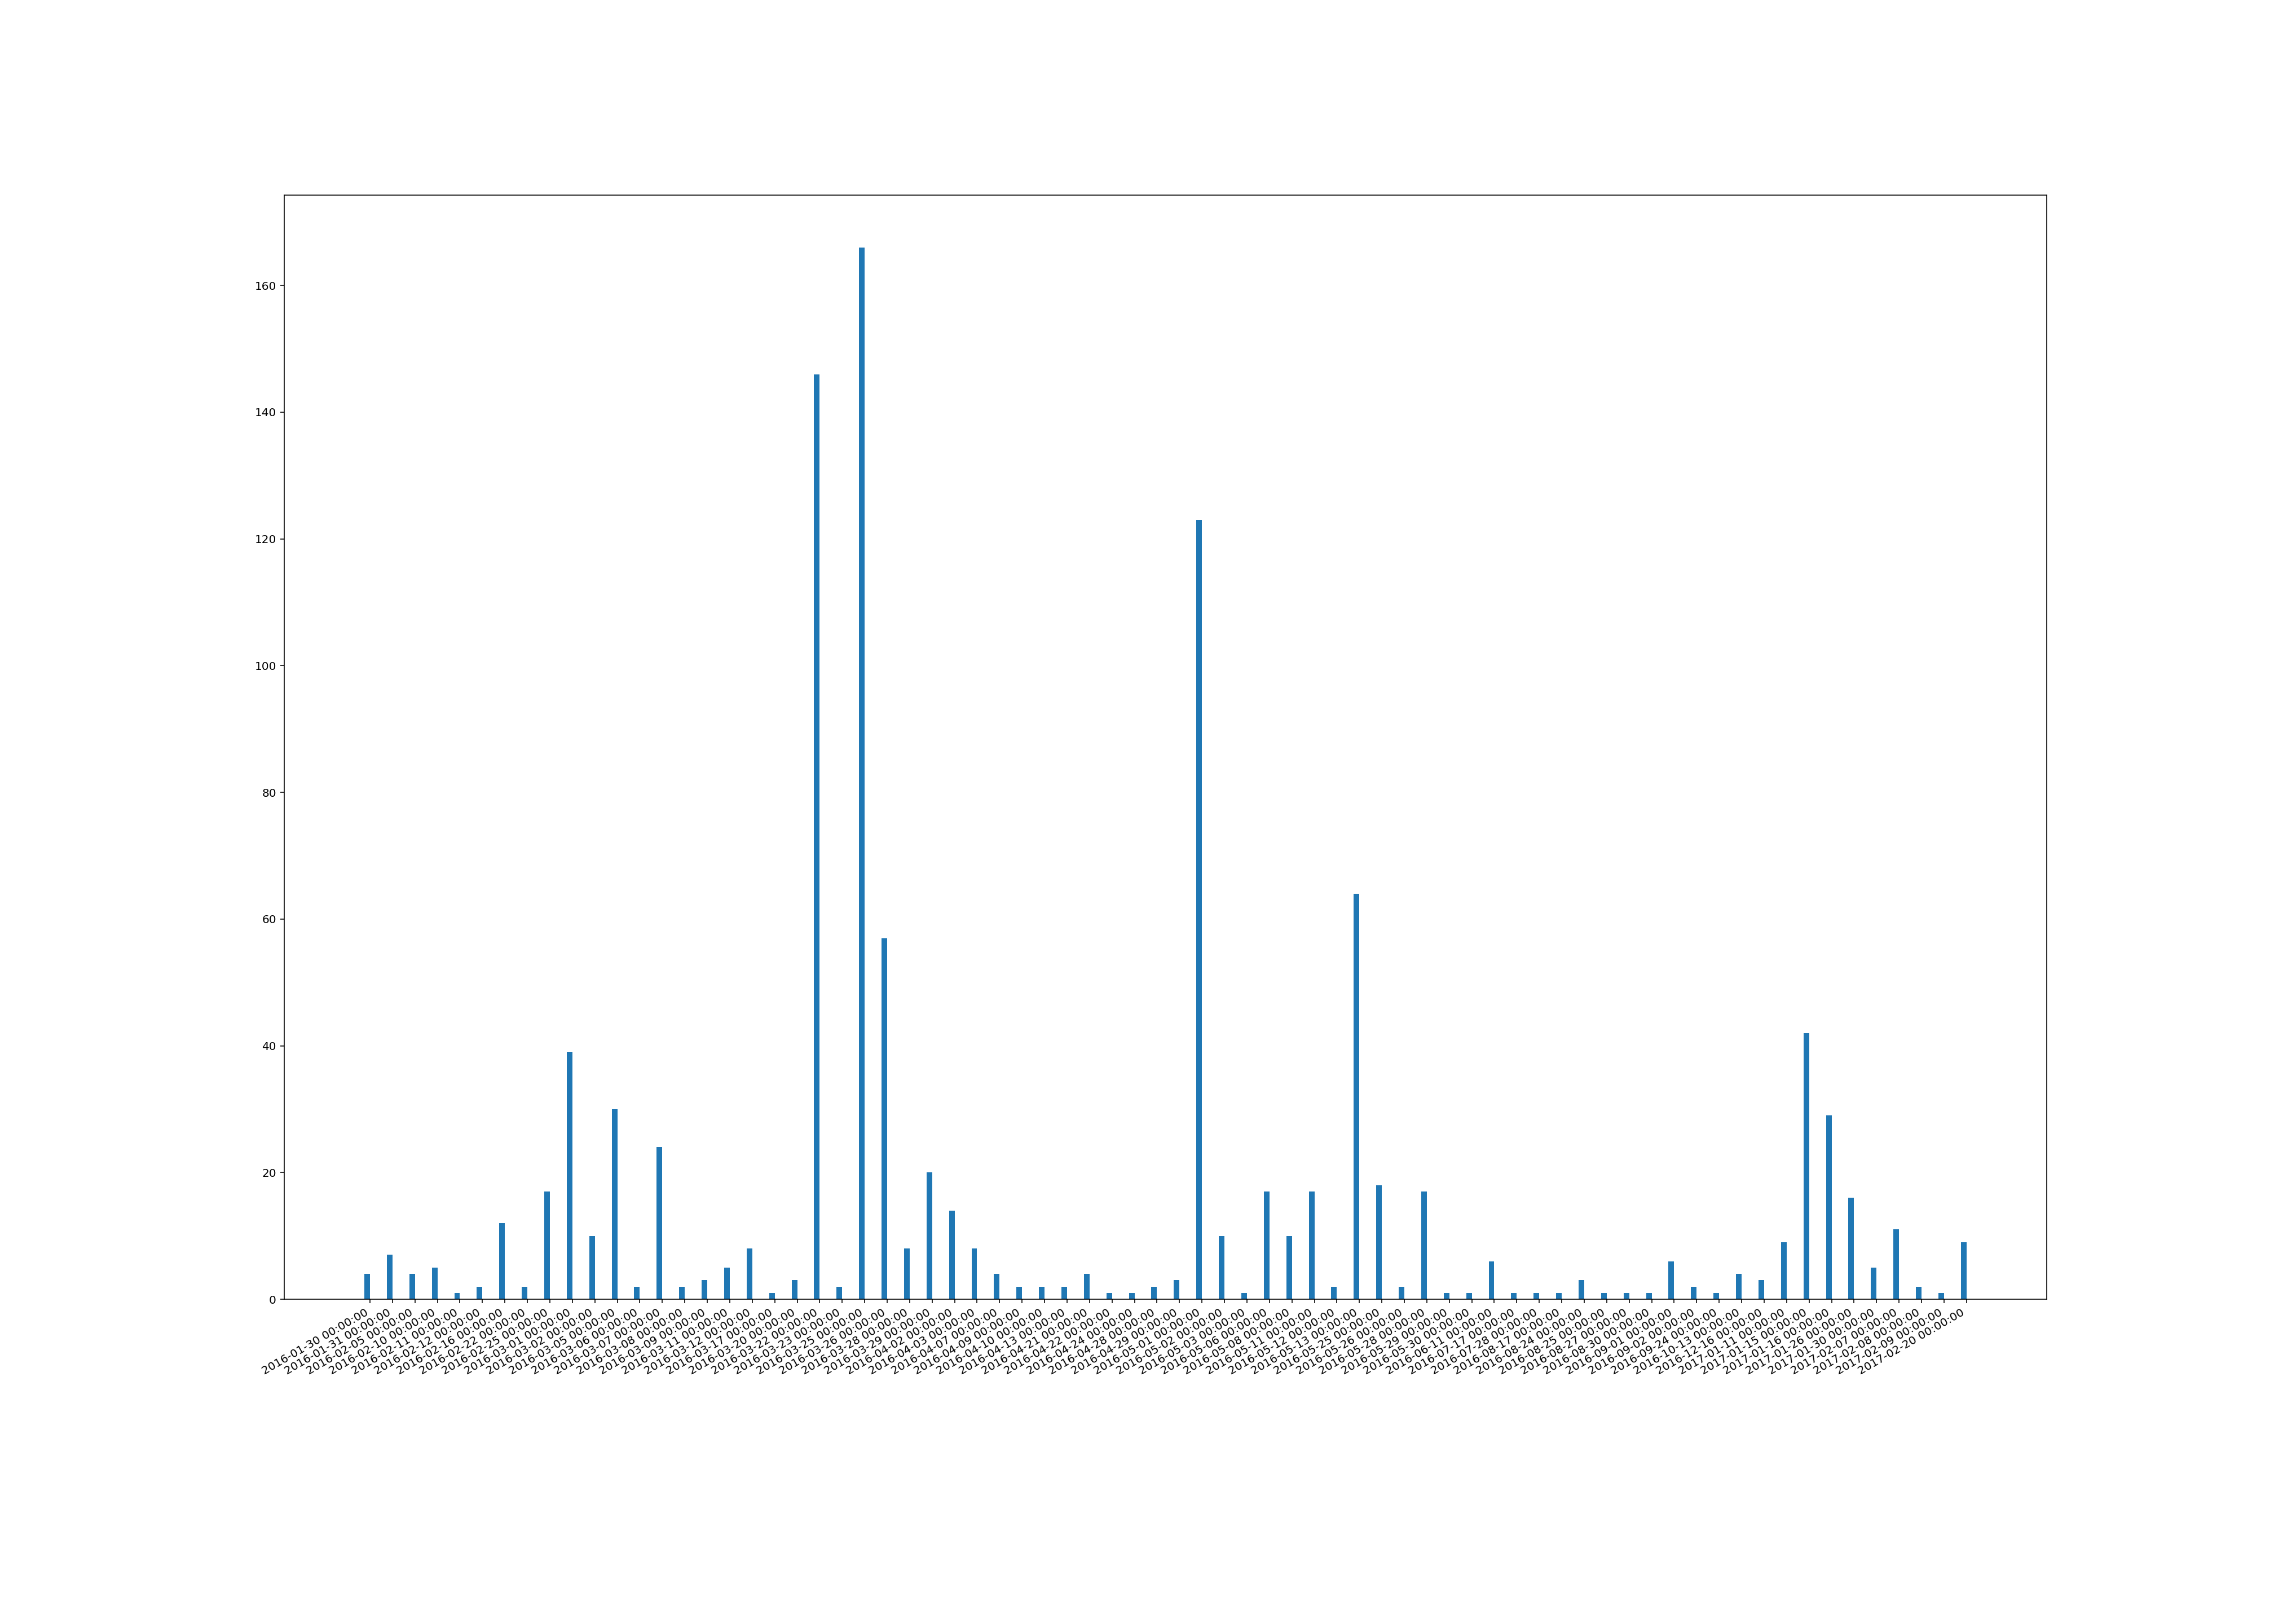

['snippets', 'VdValk', 'whois', 'aogbay', 'Laravel5.2', 'Hangbord', 'todo', 'aogbay_2', 'hoteltotaal', 'scriptsnip', 'intranet', 'bierapp', 'connect2business', 'lumentest', 'fruits', 'greuter', 'oppstap', 'botblecms']


In [71]:
import re
import datetime
import matplotlib.pyplot as plt
from dateutil.parser import parse
import numpy as np

# Configuration
file_owner = 'casper'
restricted_days = True
fig_width = 28

restricted_days_list = ['27-Mar-2016', '30-Apr-2016']
event_date_list = []
event_count = []
project_list = []
previous_match = False
infile = r'../include/logs/php_error_' + file_owner + '.log'


    
def find_between( s, first, last ):
        try:
            start = s.index( first ) + len( first )
            end = s.index( last, start )
            return s[start:end]
        except ValueError:
            return ""
        
def get_project_name(line):
    project_name = find_between( line, "htdocs/", "/" )
    if project_name not in project_list and project_name:
        project_list.append(project_name)


with open(infile) as f:
    f = f.readlines()

    
for idx, line in enumerate(f):
        match = re.findall(r"\[\s*(\d+-\D+-.*?)\s", line)
        if match:
            get_project_name(line)
            if not restricted_days or str(match[0]) not in restricted_days_list:
                if not previous_match or match != previous_match:
                    dt = parse(match[0])
                    event_date_list.append(dt)
                    event_count.append(1)
                    previous_match = match
                else:
                    event_count[-1] = event_count[-1] + 1



        
fig = plt.figure(figsize=(fig_width,20))

width = .25
ind = np.arange(len(event_count))
plt.bar(ind, event_count, width=width)
plt.xticks(ind + width / 2, event_date_list)

fig.autofmt_xdate()

plt.show()


# Events / Project

The following code displays the amount of registerd events per project.

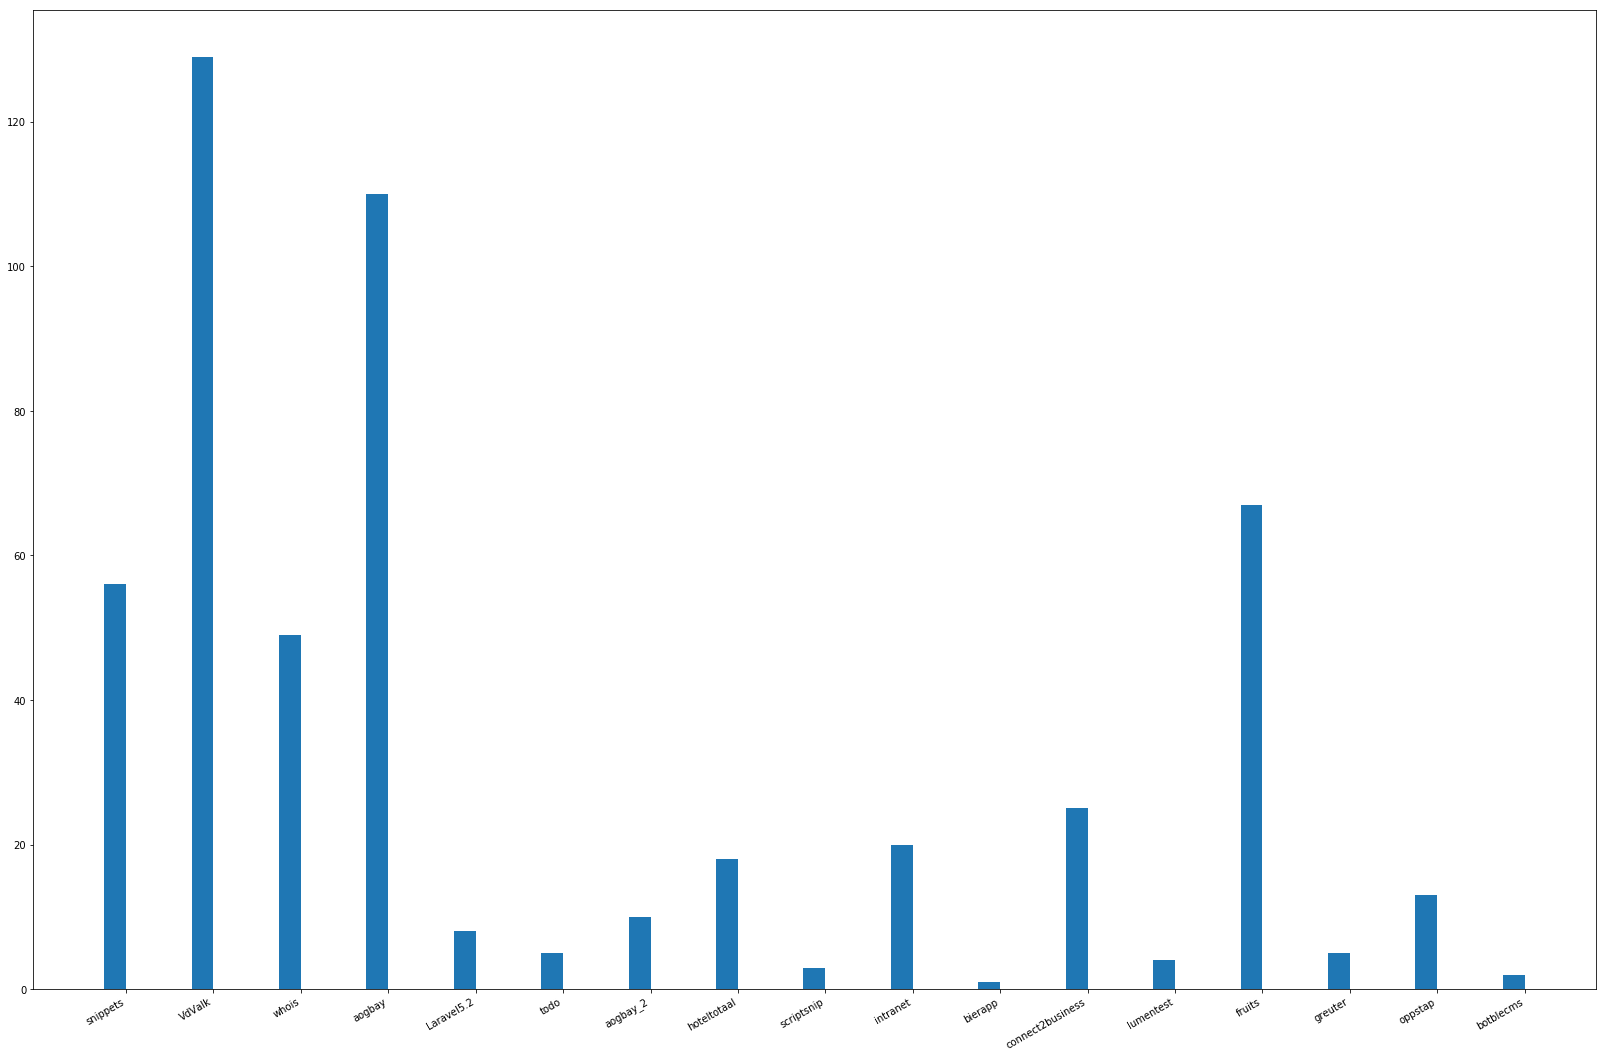

In [25]:
import re
import datetime
import matplotlib.pyplot as plt
from dateutil.parser import parse
import numpy as np

# Configuration
file_owner = 'casper'
root_folder = 'htdocs'
fig_width = 28

restricted_days_list = ['27-Mar-2016', '30-Apr-2016']
event_count = []
project_list = []
infile = r'../include/logs/php_error_' + file_owner + '.log'

def find_between( s, first, last ):
        try:
            start = s.index( first ) + len( first )
            end = s.index( last, start )
            return s[start:end]
        except ValueError:
            return ""
        
def get_project_name(line):
    return find_between( line, root_folder + "/", "/" )

def add_project(project_name):
    if project_name not in project_list and project_name:
        project_list.append(project_name)
        event_count.append(0)
    return project_name

with open(infile) as f:
    f = f.readlines()

    
    for idx, line in enumerate(f):
            match = re.findall(r"\[\s*(\d+-\D+-.*?)\s", line)
            if match:
                project_name = get_project_name(line)
                if project_name and project_name != 'Hangbord':
                    add_project(project_name)
                    idx = project_list.index(project_name)
                    project_list_length = len(event_count)
                    event_count[idx] = event_count[idx] + 1
                            


        
fig = plt.figure(figsize=(fig_width,20))

width = .25
ind = np.arange(len(event_count))
plt.bar(ind, event_count, width=width)
plt.xticks(ind + width / 2, project_list)

for i, v in enumerate(event_count):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
    
fig.autofmt_xdate()

plt.show()

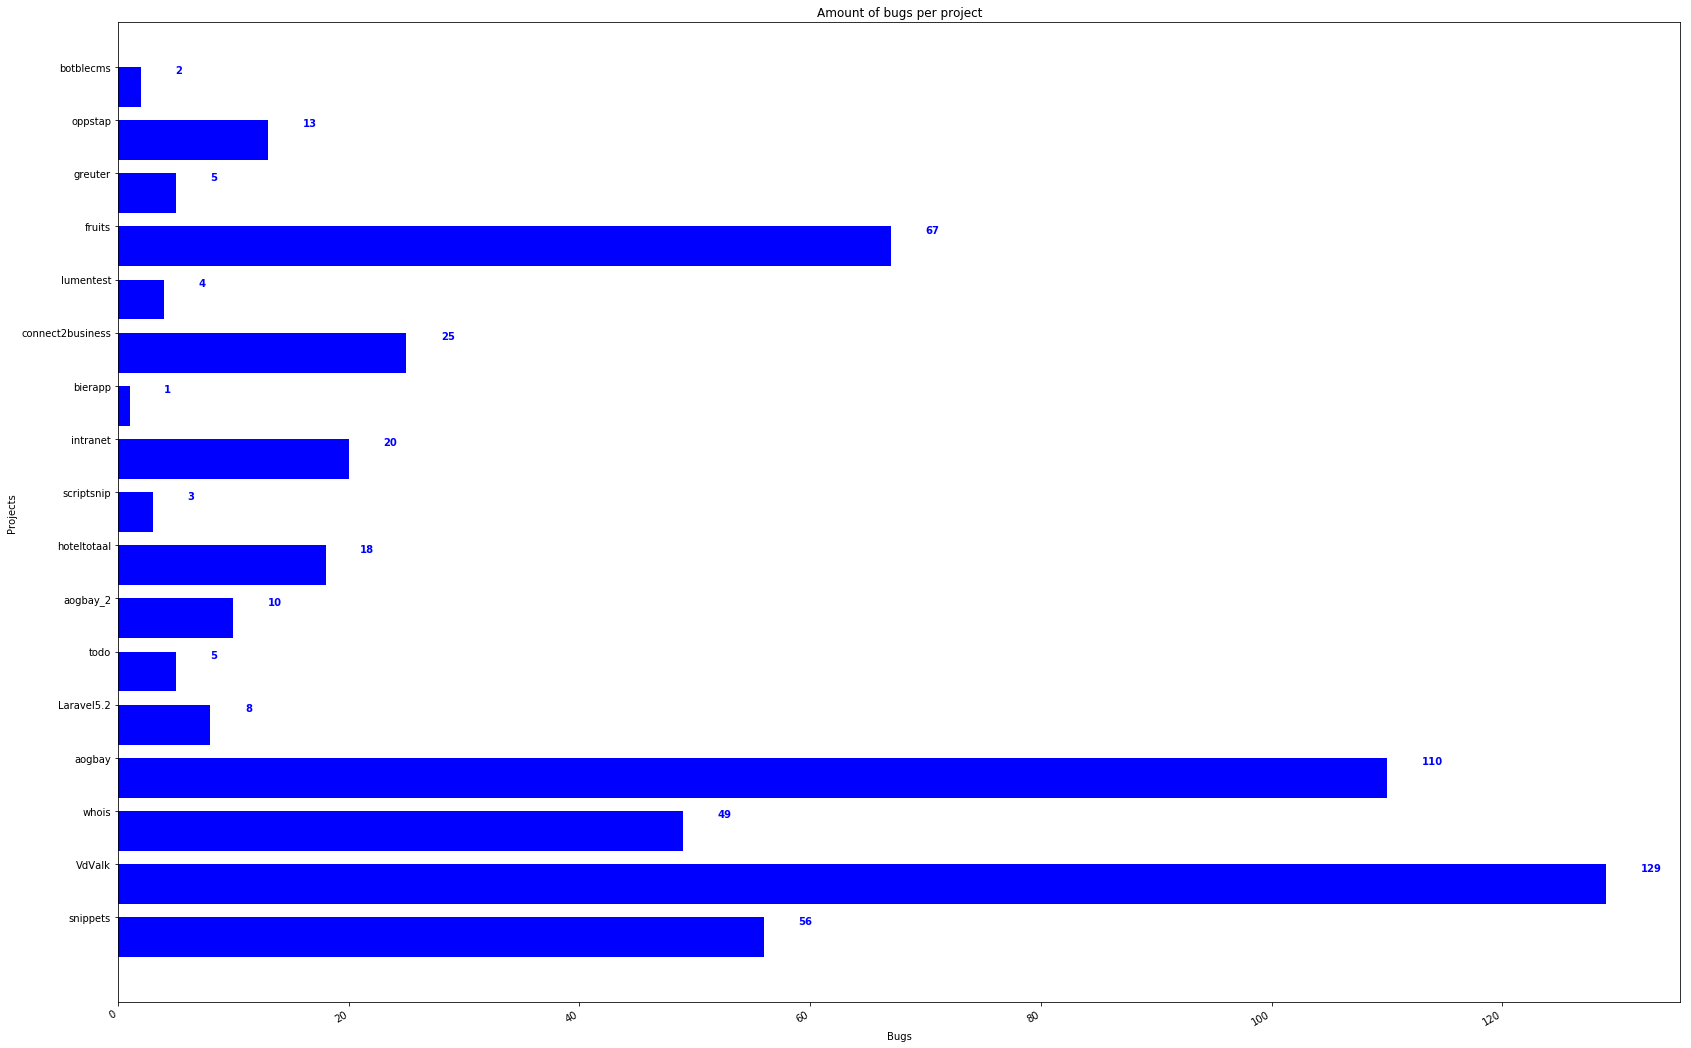

In [27]:
import re
import datetime
import matplotlib.pyplot as plt
from dateutil.parser import parse
import numpy as np

# Configuration
file_owner = 'casper'
root_folder = 'htdocs'
fig_width = 28

restricted_days_list = ['27-Mar-2016', '30-Apr-2016']
event_count = []
project_list = []
infile = r'../include/logs/php_error_' + file_owner + '.log'

def find_between( s, first, last ):
        try:
            start = s.index( first ) + len( first )
            end = s.index( last, start )
            return s[start:end]
        except ValueError:
            return ""
        
def get_project_name(line):
    return find_between( line, root_folder + "/", "/" )

def add_project(project_name):
    if project_name not in project_list and project_name:
        project_list.append(project_name)
        event_count.append(0)
    return project_name

with open(infile) as f:
    f = f.readlines()

    
    for idx, line in enumerate(f):
            match = re.findall(r"\[\s*(\d+-\D+-.*?)\s", line)
            if match:
                project_name = get_project_name(line)
                if project_name and project_name != 'Hangbord':
                    add_project(project_name)
                    idx = project_list.index(project_name)
                    event_count[idx] = event_count[idx] + 1
                            


        
fig, ax = plt.subplots(figsize=(fig_width,20))  
width = 0.75 # the width of the bars 
ind = np.arange(len(event_count))  # the x locations for the groups
ax.barh(ind, event_count, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(project_list, minor=False)
plt.title('Amount of bugs per project')
plt.xlabel('Bugs')
plt.ylabel('Projects')  

for i, v in enumerate(event_count):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

fig.autofmt_xdate()

plt.show()

# 